# Artigo 6 - Qual sua qualidade de sono?
## Autor

Nome: Thiago Cerqueira Borges </br> 
Matricula: 190117508 </br>
Github: Thiago-Cerq </br>
---

| Hitórico de versão |    Data    |
|:------------------:|:----------:|
|      ver 1.0       | 20/11/2023 | 

---

## Imports

In [44]:
!pip install --upgrade scikit-learn pandas
import os
import pandas as pd
import numpy as np
from pathlib import Path
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle: path = Path('/kaggle/input/water-quality-and-potability')
else:
    import zipfile,kaggle
    path = Path('water')
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(path)

df = pd.read_csv(path/'water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [45]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [46]:
modes = df.mode().iloc[0]
df.fillna(modes, inplace=True)

In [47]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Pra facilitar o tratamento das coluans vou transformar Gender, Sleep Disorder, Occupation e BMI Category em variaveis categoricas e excluir golunas que não vou ultilizar

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

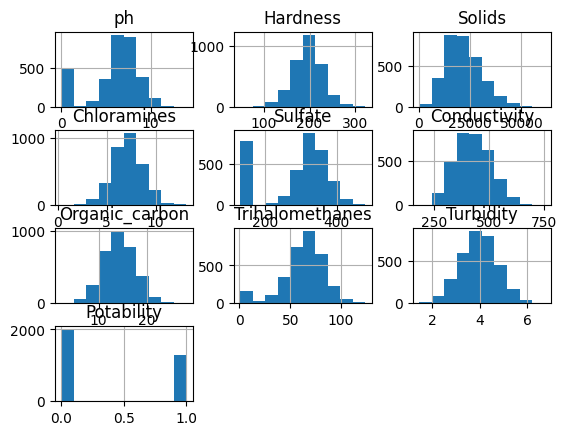

In [48]:
df.hist()

<Axes: xlabel='Potability'>

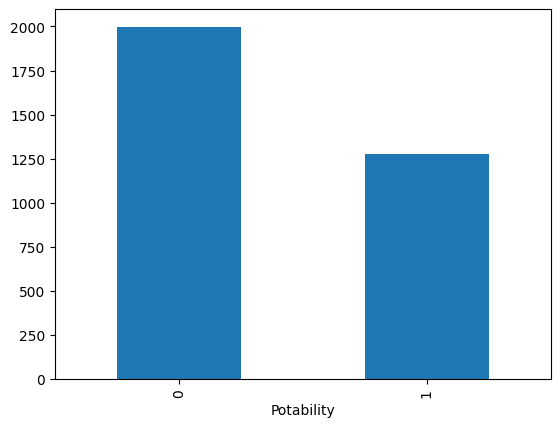

In [50]:
df['Potability'].value_counts().plot.bar()

# Divisão Binaria

## Dividindo data de Terino e Validação


In [51]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)





In [ ]:
conts=['ph', 'Hardness', 'Solids', 'Chloramines','Sulfate', 'Conductivity', 'Organic_carbon','Trihalomethanes', 'Turbidity']
dep = "Potability"



## Dividindo o datadrame em 2 partes

In [52]:
def xs_y(df):
    xs = df[conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)
trn_xs

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2500,0.000000,202.569467,22256.950365,6.913501,304.951498,434.198436,13.696893,64.205667,4.478070
1044,5.319769,204.202072,22390.795566,8.053559,315.027505,399.119025,13.974085,83.157997,2.925732
415,7.350379,193.633367,26736.085567,10.416589,309.416883,557.495685,16.519722,61.077383,3.663922
2841,7.612517,225.492793,14812.970645,7.982595,356.690174,341.074925,14.994662,55.893916,2.939593
2567,7.122637,183.402648,31295.902410,4.425026,129.000000,411.616070,14.066057,77.185792,3.750447
...,...,...,...,...,...,...,...,...,...
1095,4.187491,208.374188,21809.709834,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959
1130,7.793915,164.958947,25506.912237,7.868036,358.259200,398.460312,15.297496,0.738000,4.220028
1294,6.630364,186.761088,30939.023214,7.703481,129.000000,330.876083,13.815757,86.753117,3.490588
860,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137


In [53]:
trn_y

2500    0
1044    0
415     0
2841    1
2567    0
       ..
1095    1
1130    1
1294    0
860     0
3174    1
Name: Potability, Length: 2457, dtype: int64

In [72]:
preds = val_xs.ph<5

In [73]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, preds)

0.48473748473748474

## Criando arvore de decisão

In [54]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y);

In [55]:
import graphviz


def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

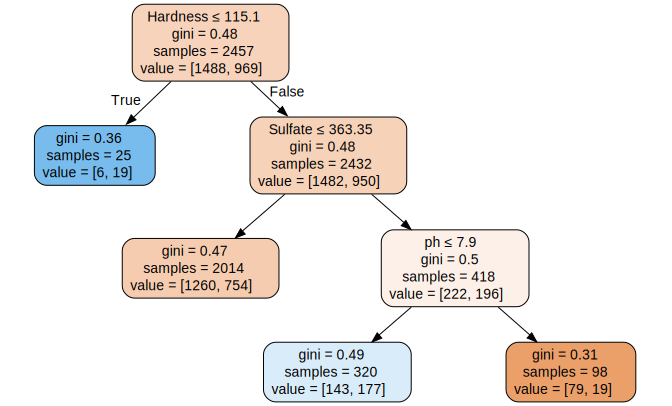

In [56]:
import re

draw_tree(m, trn_xs)

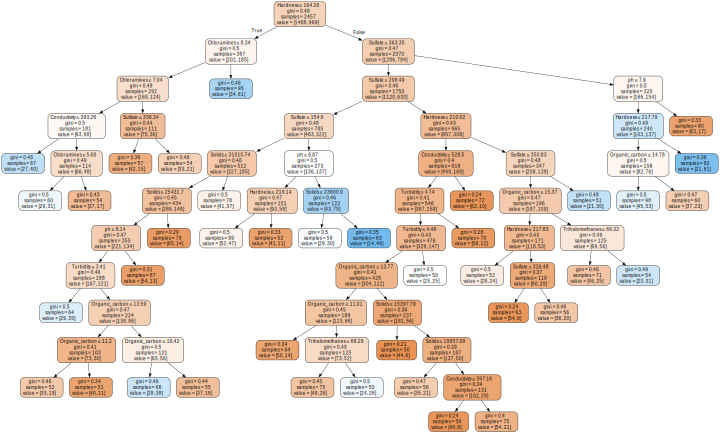

In [57]:
m = DecisionTreeClassifier(min_samples_leaf=50).fit(trn_xs, trn_y)
draw_tree(m, trn_xs)

## Floresta randomica

In [58]:
def get_tree(prop=0.75):
    n = len(trn_y)
    idxs = random.choice(n, int(n*prop))
    return DecisionTreeClassifier(min_samples_leaf=5).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])

In [59]:

from sklearn.metrics import mean_absolute_error


mean_absolute_error(val_y, m.predict(val_xs))


0.409035409035409

In [60]:
trees = [get_tree() for t in range(100)]

In [74]:
all_probs = [t.predict(val_xs) for t in trees]
avg_probs = np.stack(all_probs).mean(0)

mean_absolute_error(val_y, avg_probs)

0.42246642246642246

In [75]:
def acc(probs):
    predictions = (probs > 0.5).astype(np.float32)
    return np.mean(predictions == val_y)
acc(avg_probs)

0.6935286935286935

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
preds = rf.predict(val_xs)
mean_absolute_error(val_y, preds)

0.3064713064713065

In [79]:
acc(preds)

0.6935286935286935

In [80]:
import joblib
joblib.dump(rf, 'model.joblib')

['model.joblib']

## Link para acessar a aplicação no p Hugging Face 🤗

https://huggingface.co/spaces/Thiago-Cerq/Water

# Referências

Jeremy Howard and Sylvain Gugge. FastBook. Disponível em https://github.com/fastai/fastbook. Acessado e 10 de Setembro de 2023.023

Repositorio da Disciplina Disponível em https://github.com/fabraz/fastaiOnCampus. Acessado em 10 de Setembro de 2023.